Attribute Information:
1. Individual identification (ID)
2. Reason for absence (ICD).
Absences attested by the International Code of Diseases (ICD) stratified into 21 categories (I to XXI) as follows:

I Certain infectious and parasitic diseases  
II Neoplasms  
III Diseases of the blood and blood-forming organs and certain disorders involving the immune mechanism  
IV Endocrine, nutritional and metabolic diseases  
V Mental and behavioural disorders  
VI Diseases of the nervous system  
VII Diseases of the eye and adnexa  
VIII Diseases of the ear and mastoid process  
IX Diseases of the circulatory system  
X Diseases of the respiratory system  
XI Diseases of the digestive system  
XII Diseases of the skin and subcutaneous tissue  
XIII Diseases of the musculoskeletal system and connective tissue  
XIV Diseases of the genitourinary system  
XV Pregnancy, childbirth and the puerperium  
XVI Certain conditions originating in the perinatal period  
XVII Congenital malformations, deformations and chromosomal abnormalities  
XVIII Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified  
XIX Injury, poisoning and certain other consequences of external causes  
XX External causes of morbidity and mortality  
XXI Factors influencing health status and contact with health services.

And 7 categories without (CID) patient follow-up (22), medical consultation (23), blood donation (24), laboratory examination (25), unjustified absence (26), physiotherapy (27), dental consultation (28).
3. Month of absence
4. Day of the week (Monday (2), Tuesday (3), Wednesday (4), Thursday (5), Friday (6))
5. Seasons
6. Transportation expense
7. Distance from Residence to Work (kilometers)
8. Service time
9. Age
10. Work load Average/day 
11. Hit target
12. Disciplinary failure (yes=1; no=0)
13. Education (high school (1), graduate (2), postgraduate (3), master and doctor (4))
14. Son (number of children)
15. Social drinker (yes=1; no=0)
16. Social smoker (yes=1; no=0)
17. Pet (number of pet)
18. Weight
19. Height
20. Body mass index
21. Absenteeism time in hours (target)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = 30

In [2]:
raw_data = pd.read_excel('Absenteeism_at_work.xlsx')
raw_data.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239554,97,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239554,97,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239554,97,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239554,97,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239554,97,0,1,2,1,0,1,90,172,30,2


In [3]:
raw_data.shape

(740, 21)

In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   ID                               740 non-null    int64
 1   Reason for absence               740 non-null    int64
 2   Month of absence                 740 non-null    int64
 3   Day of the week                  740 non-null    int64
 4   Seasons                          740 non-null    int64
 5   Transportation expense           740 non-null    int64
 6   Distance from Residence to Work  740 non-null    int64
 7   Service time                     740 non-null    int64
 8   Age                              740 non-null    int64
 9   Work load Average/day            740 non-null    int64
 10  Hit target                       740 non-null    int64
 11  Disciplinary failure             740 non-null    int64
 12  Education                        740 non-null    i

In [5]:
raw_data.describe()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,18.017568,19.216216,6.324324,3.914865,2.544595,221.329730,29.631081,12.554054,36.450000,271490.235135,94.587838,0.054054,1.291892,1.018919,0.567568,0.072973,0.745946,79.035135,172.114865,26.677027,6.924324
std,11.021247,8.433406,3.436287,1.421675,1.111831,66.952223,14.836788,4.384873,6.478772,39058.116188,3.779313,0.226277,0.673238,1.098489,0.495749,0.260268,1.318258,12.883211,6.034995,4.285452,13.330998
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205917.000000,81.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244387.000000,93.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264249.000000,95.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294217.000000,97.000000,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378884.000000,100.000000,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


#### Dropping ID Column

In [6]:
df = raw_data.drop('ID', axis = 1)

#### Dealing with Reason for absence column

In [7]:
df['Reason'] = df['Reason for absence']
df.drop(['Reason for absence'], axis = 1, inplace = True)

In [8]:
df['Reason'].min(), df['Reason'].max()

(0, 28)

In [9]:
len(df['Reason'].unique()) # 1 type of reason is not present

28

In [10]:
sorted(df['Reason'].unique()) # Reason 20 is not present in the dataset

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28]

In [11]:
df['Reason'].value_counts() # Reason 23 and 28 are the most cited reasons for absence.

23    149
28    112
27     69
13     55
0      43
19     40
22     38
26     33
25     31
11     26
10     25
18     21
14     19
1      16
7      15
6       8
12      8
8       6
21      6
9       4
5       3
24      3
16      3
4       2
15      2
3       1
2       1
17      1
Name: Reason, dtype: int64

In [12]:
reasons_columns = pd.get_dummies(df['Reason'], drop_first = True)
reasons_columns.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,21,22,23,24,25,26,27,28
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [13]:
reason_type_1 = reasons_columns.loc[:, 1:14].max(axis = 1)
reason_type_2 = reasons_columns.loc[:, 15:17].max(axis = 1)
reason_type_3 = reasons_columns.loc[:, 18:21].max(axis = 1)
reason_type_4 = reasons_columns.loc[:, 22:].max(axis = 1)

In [14]:
df = df.drop('Reason', axis = 1)

In [15]:
df = pd.concat([df, reason_type_1, reason_type_2, reason_type_3, reason_type_4], axis = 1)
df.head()

,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours,0,1,2,3
0,7,3,1,289,36,13,33,239554,97,0,1,2,1,0,1,90,172,30,4,0,0,0,1
1,7,3,1,118,13,18,50,239554,97,1,1,1,1,0,0,98,178,31,0,0,0,0,0
2,7,4,1,179,51,18,38,239554,97,0,1,0,1,0,0,89,170,31,2,0,0,0,1
3,7,5,1,279,5,14,39,239554,97,0,1,2,1,1,0,68,168,24,4,1,0,0,0
4,7,5,1,289,36,13,33,239554,97,0,1,2,1,0,1,90,172,30,2,0,0,0,1


#### Renaming Columns

In [16]:
df.columns.values

array(['Month of absence', 'Day of the week', 'Seasons',
       'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours', 0, 1, 2, 3], dtype=object)

In [17]:
column_names = ['Month', 'Day', 'Seasons',
       'Transportation_Expense', 'Distance',
       'Service_Time', 'Age', 'Workload ', 'Hit_Target',
       'Disciplinary_Failure', 'Education', 'Son', 'Social_Drinker',
       'Social_Smoker', 'Pet', 'Weight', 'Height', 'BMI',
       'Absenteeism', 'Reason1', 'Reason2', 'Reason3', 'Reason4']

In [18]:
df.columns = column_names
df.head()

,Month,Day,Seasons,Transportation_Expense,Distance,Service_Time,Age,Workload,Hit_Target,Disciplinary_Failure,Education,Son,Social_Drinker,Social_Smoker,Pet,Weight,Height,BMI,Absenteeism,Reason1,Reason2,Reason3,Reason4
0,7,3,1,289,36,13,33,239554,97,0,1,2,1,0,1,90,172,30,4,0,0,0,1
1,7,3,1,118,13,18,50,239554,97,1,1,1,1,0,0,98,178,31,0,0,0,0,0
2,7,4,1,179,51,18,38,239554,97,0,1,0,1,0,0,89,170,31,2,0,0,0,1
3,7,5,1,279,5,14,39,239554,97,0,1,2,1,1,0,68,168,24,4,1,0,0,0
4,7,5,1,289,36,13,33,239554,97,0,1,2,1,0,1,90,172,30,2,0,0,0,1


#### Reordering Columns

In [19]:
column_order = [ 'Reason1', 'Reason2', 'Reason3', 'Reason4', 'Month', 'Day', 'Seasons', 'Transportation_Expense', 'Distance',
                'Service_Time', 'Age', 'Workload ', 'Hit_Target', 'Disciplinary_Failure', 'Education', 'Son', 'Social_Drinker',
                'Social_Smoker', 'Pet', 'Weight', 'Height', 'BMI', 'Absenteeism']
df = df[column_order]
df.head()

,Reason1,Reason2,Reason3,Reason4,Month,Day,Seasons,Transportation_Expense,Distance,Service_Time,Age,Workload,Hit_Target,Disciplinary_Failure,Education,Son,Social_Drinker,Social_Smoker,Pet,Weight,Height,BMI,Absenteeism
0,0,0,0,1,7,3,1,289,36,13,33,239554,97,0,1,2,1,0,1,90,172,30,4
1,0,0,0,0,7,3,1,118,13,18,50,239554,97,1,1,1,1,0,0,98,178,31,0
2,0,0,0,1,7,4,1,179,51,18,38,239554,97,0,1,0,1,0,0,89,170,31,2
3,1,0,0,0,7,5,1,279,5,14,39,239554,97,0,1,2,1,1,0,68,168,24,4
4,0,0,0,1,7,5,1,289,36,13,33,239554,97,0,1,2,1,0,1,90,172,30,2


#### Analyzing Month and Day columns

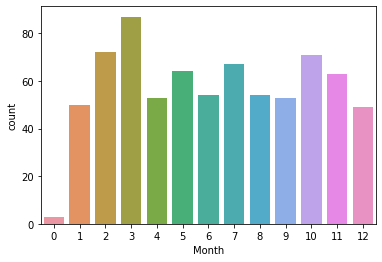

In [20]:
sns.countplot(df['Month'])
plt.show()

In [21]:
# 0 is an abnormal value in month column
print(df['Month'].value_counts())

3     87
2     72
10    71
7     67
5     64
11    63
8     54
6     54
9     53
4     53
1     50
12    49
0      3
Name: Month, dtype: int64


In [22]:
df[df['Month'] == 0]

,Reason1,Reason2,Reason3,Reason4,Month,Day,Seasons,Transportation_Expense,Distance,Service_Time,Age,Workload,Hit_Target,Disciplinary_Failure,Education,Son,Social_Drinker,Social_Smoker,Pet,Weight,Height,BMI,Absenteeism
737,0,0,0,0,0,3,1,118,14,13,40,271219,95,0,1,1,1,0,8,98,170,34,0
738,0,0,0,0,0,4,2,231,35,14,39,271219,95,0,1,2,1,0,2,100,170,35,0
739,0,0,0,0,0,6,3,179,45,14,53,271219,95,0,1,1,0,0,1,77,175,25,0


In [23]:
raw_data[raw_data['Reason for absence'] == 0]

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
1,36,0,7,3,1,118,13,18,50,239554,97,1,1,1,1,0,0,98,178,31,0
50,20,0,9,2,4,260,50,11,36,241476,92,1,1,4,1,0,0,65,168,23,0
51,29,0,9,2,4,225,26,9,28,241476,92,1,1,1,0,0,2,69,169,24,0
54,11,0,9,3,4,289,36,13,33,241476,92,1,1,2,1,0,1,90,172,30,0
55,36,0,9,3,4,118,13,18,50,241476,92,1,1,1,1,0,0,98,178,31,0
58,13,0,9,4,4,369,17,12,31,241476,92,1,1,3,1,0,0,70,169,25,0
64,36,0,10,4,4,118,13,18,50,253465,93,1,1,1,1,0,0,98,178,31,0
203,2,0,4,2,3,235,29,12,48,326452,96,1,1,1,0,1,5,88,163,33,0
213,7,0,5,4,3,279,5,14,39,378884,92,1,1,2,1,1,0,68,168,24,0
214,18,0,5,4,3,330,16,4,28,378884,92,1,2,0,0,0,0,84,182,25,0


In [24]:
df.shape

(740, 23)

In [25]:
# Dropping 3 observations with 0 Month
df = df[df['Month'] != 0]
df.shape

(737, 23)

In [26]:
df['Month'].unique()

array([ 7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6], dtype=int64)

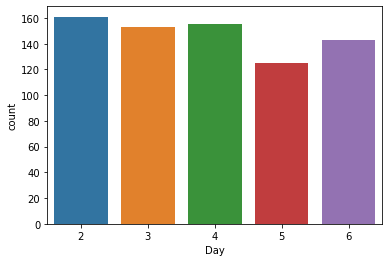

In [27]:
sns.countplot(df['Day'])
plt.show()

#### Removing Height and Weight columns since we have BMI Column

In [28]:
df = df.drop(['Height', 'Weight'], axis = 1)
df.shape

(737, 21)

In [29]:
df.head()

,Reason1,Reason2,Reason3,Reason4,Month,Day,Seasons,Transportation_Expense,Distance,Service_Time,Age,Workload,Hit_Target,Disciplinary_Failure,Education,Son,Social_Drinker,Social_Smoker,Pet,BMI,Absenteeism
0,0,0,0,1,7,3,1,289,36,13,33,239554,97,0,1,2,1,0,1,30,4
1,0,0,0,0,7,3,1,118,13,18,50,239554,97,1,1,1,1,0,0,31,0
2,0,0,0,1,7,4,1,179,51,18,38,239554,97,0,1,0,1,0,0,31,2
3,1,0,0,0,7,5,1,279,5,14,39,239554,97,0,1,2,1,1,0,24,4
4,0,0,0,1,7,5,1,289,36,13,33,239554,97,0,1,2,1,0,1,30,2


#### Checking Correlation Map

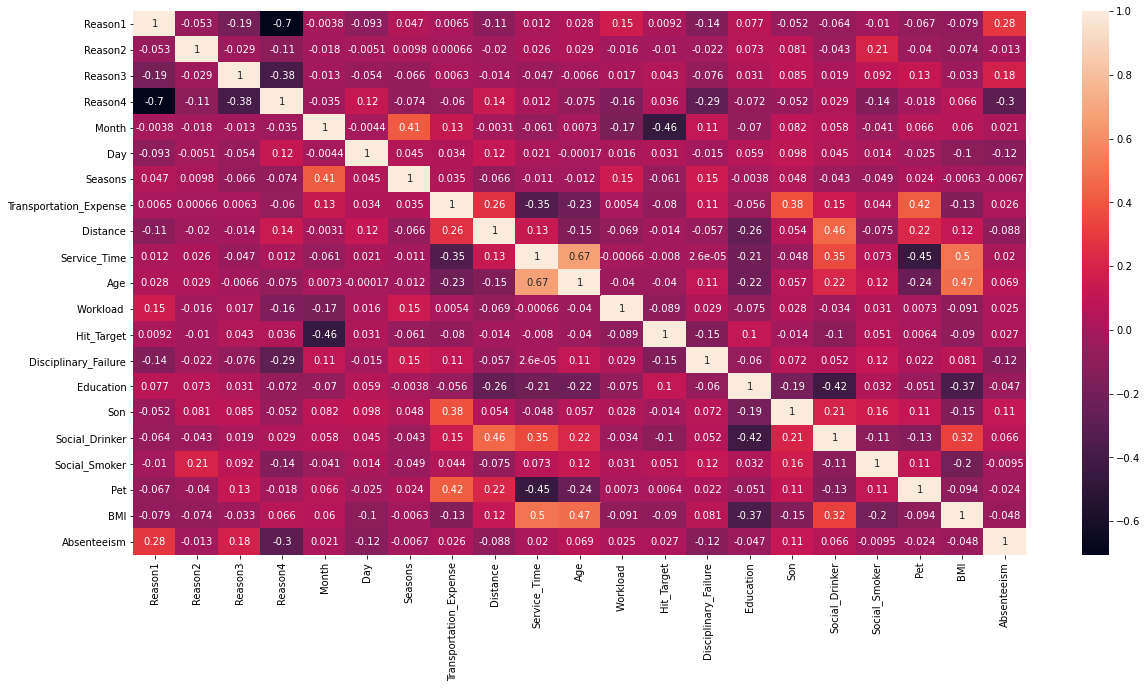

In [30]:
plt.figure(figsize = (20, 10))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [31]:
# Seasons has a mild correlation with months which is obvious, hence dropping seasons wince we have months column
df = df.drop('Seasons', 1)
df.shape

(737, 20)

In [32]:
# Service Time and Age are highly correlated which is obvious, the more the age the more time the person has spent in service.
# Dropping Service Time
df = df.drop('Service_Time', 1)
df.shape

(737, 19)

In [33]:
df.head()

,Reason1,Reason2,Reason3,Reason4,Month,Day,Transportation_Expense,Distance,Age,Workload,Hit_Target,Disciplinary_Failure,Education,Son,Social_Drinker,Social_Smoker,Pet,BMI,Absenteeism
0,0,0,0,1,7,3,289,36,33,239554,97,0,1,2,1,0,1,30,4
1,0,0,0,0,7,3,118,13,50,239554,97,1,1,1,1,0,0,31,0
2,0,0,0,1,7,4,179,51,38,239554,97,0,1,0,1,0,0,31,2
3,1,0,0,0,7,5,279,5,39,239554,97,0,1,2,1,1,0,24,4
4,0,0,0,1,7,5,289,36,33,239554,97,0,1,2,1,0,1,30,2


#### Analyzing other columns

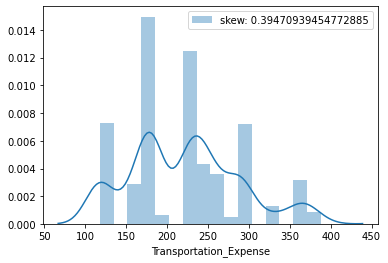

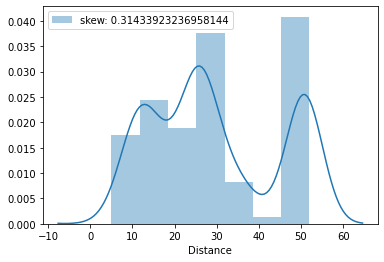

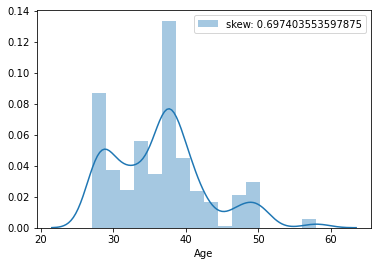

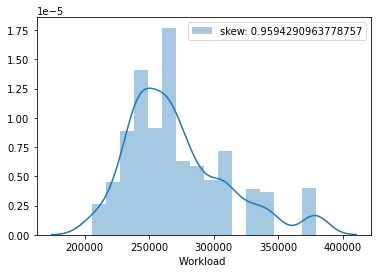

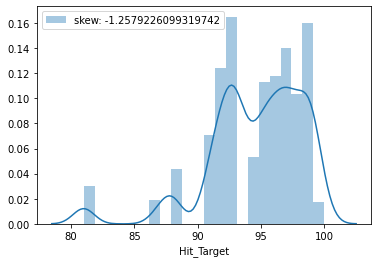

In [34]:
for i in df.columns[6:11]:
    sns.distplot(df[i], label = f'skew: {df[i].skew()}')
    plt.legend(loc = 'best')
    plt.show()

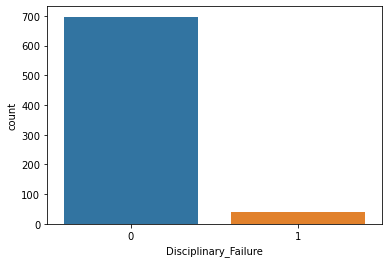

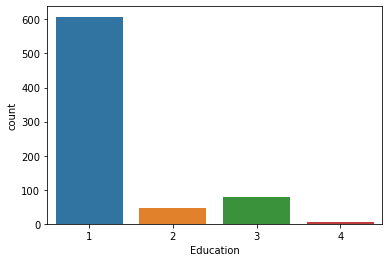

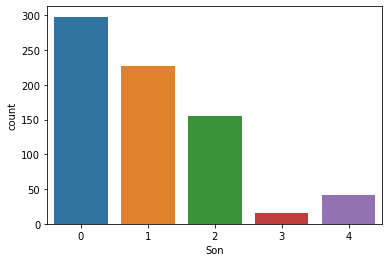

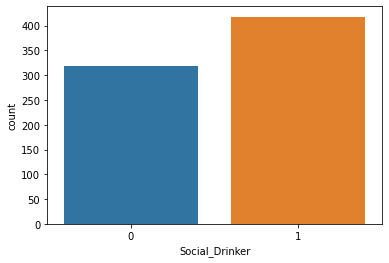

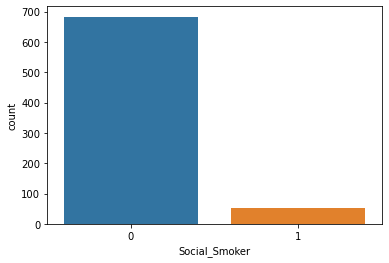

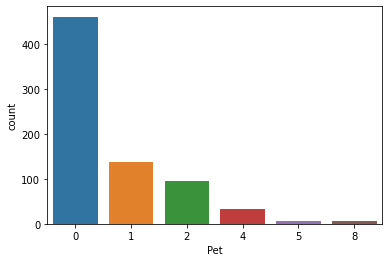

In [35]:
for i in df.columns[11:17]:
    sns.countplot(df[i])
    plt.show()

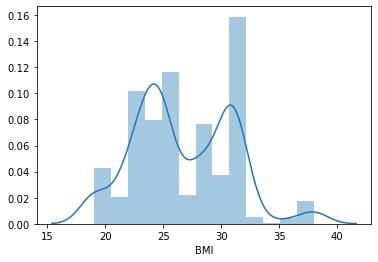

In [36]:
sns.distplot(df['BMI'])
plt.show()

#### Combining categories in Education column since most of the people have high school education, so no point in categorizing educations above high school separately.

In [37]:
df['Education'] = df['Education'].map({1:0, 2:1, 3:1, 4:1})
df['Education'].value_counts(1) # 0 - High School, 1 - More than high school education

0    0.824966
1    0.175034
Name: Education, dtype: float64

In [38]:
df_preprocessed = df.copy()
df_preprocessed.head()

,Reason1,Reason2,Reason3,Reason4,Month,Day,Transportation_Expense,Distance,Age,Workload,Hit_Target,Disciplinary_Failure,Education,Son,Social_Drinker,Social_Smoker,Pet,BMI,Absenteeism
0,0,0,0,1,7,3,289,36,33,239554,97,0,0,2,1,0,1,30,4
1,0,0,0,0,7,3,118,13,50,239554,97,1,0,1,1,0,0,31,0
2,0,0,0,1,7,4,179,51,38,239554,97,0,0,0,1,0,0,31,2
3,1,0,0,0,7,5,279,5,39,239554,97,0,0,2,1,1,0,24,4
4,0,0,0,1,7,5,289,36,33,239554,97,0,0,2,1,0,1,30,2


In [39]:
df_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 737 entries, 0 to 736
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Reason1                 737 non-null    uint8
 1   Reason2                 737 non-null    uint8
 2   Reason3                 737 non-null    uint8
 3   Reason4                 737 non-null    uint8
 4   Month                   737 non-null    int64
 5   Day                     737 non-null    int64
 6   Transportation_Expense  737 non-null    int64
 7   Distance                737 non-null    int64
 8   Age                     737 non-null    int64
 9   Workload                737 non-null    int64
 10  Hit_Target              737 non-null    int64
 11  Disciplinary_Failure    737 non-null    int64
 12  Education               737 non-null    int64
 13  Son                     737 non-null    int64
 14  Social_Drinker          737 non-null    int64
 15  Social_Smoker          

In [40]:
df_preprocessed.to_csv('Absenteeism_preprocessed.csv', index=False)